In [59]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import helpers as hlp
import os
import preprocessing as prep

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
path = '/Users/maelynenguyen/Desktop/ML/dataset_to_release'
abs_path = path
#os.getcwd() + 
x_train_, x_test_, y_train_, train_ids_, test_ids_ = hlp.load_csv_data(abs_path)


In [61]:
x_train = x_train_.copy()
x_test = x_test_.copy()
y_train = y_train_.copy()

In [62]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(328135, 321)
(109379, 321)
(328135,)


In [63]:
nan_col = np.isnan(x_train).sum(axis=0)
nan_row = np.isnan(x_train).sum(axis=1)


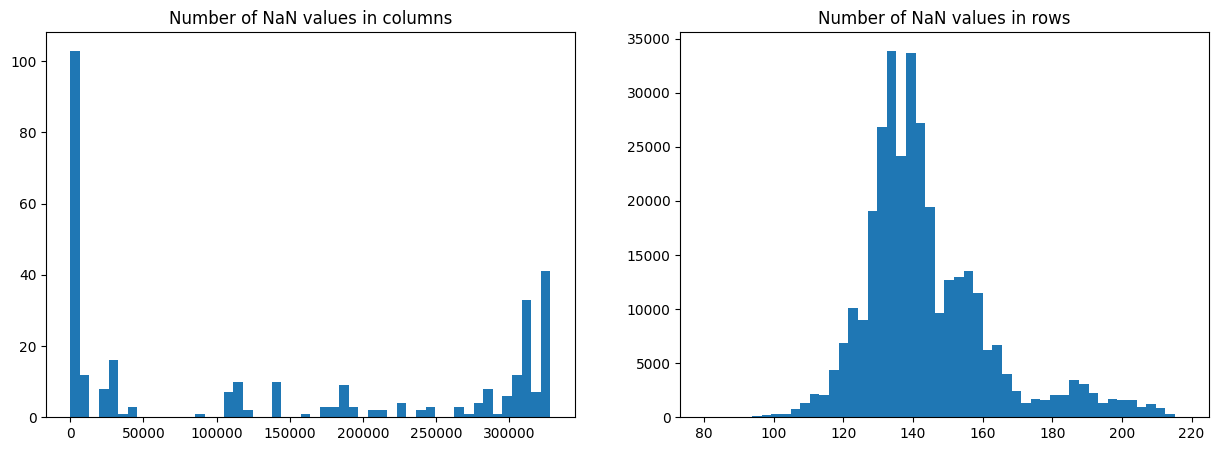

In [64]:
# plot subplots for count of nan values in columns and rows
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(nan_col, bins=50)
ax[0].set_title('Number of NaN values in columns')
ax[1].hist(nan_row, bins=50)
ax[1].set_title('Number of NaN values in rows')
plt.show()


In [65]:
x_train_cleaned = prep.clean_data(x_train)

Number of columns with more than 90% NaN: 99
Number of columns with std < 0.1: 10
Number of perfectly correlated columns: 21
Columns to drop: [3, 8, 9, 10, 11, 12, 14, 18, 19, 21, 22, 55, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 194, 195, 196, 197, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 219, 240, 244, 247, 248, 249, 257, 265, 274, 278, 279, 280, 281, 282, 283, 288, 298, 307, 308, 309, 317]
Number of perfectly correlated columns after cleaning: 4


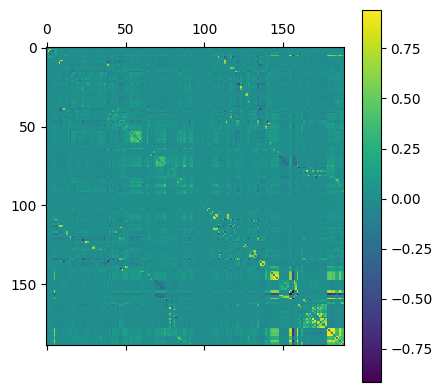

In [66]:
# plot correlation matrix
corr = np.corrcoef(x_train_cleaned, rowvar=False)
# remove diagnoal
corr = corr - np.eye(corr.shape[0])
plt.matshow(corr)
plt.colorbar()
plt.show()

In [67]:
# print the number of columns with correlation > 0.9
corr_col = np.where(corr > 0.95)
print(len(set(corr_col[0])))


0


In [68]:
print(x_train_cleaned.shape)

(328135, 189)


In [121]:
#Standardize the data
def standardize(x):
    centered_data = x - np.mean(x, axis=0)
    std_data = centered_data / np.std(centered_data, axis=0)

    return std_data

x_train_cleaned_scaled = standardize(x_train_cleaned)


In [139]:
w, loss = imp.mean_squared_error_gd(y_train, x_train_cleaned_scaled, np.zeros(x_train_cleaned.shape[1]), 200, 0.1)
y_pred = np.dot(x_train_cleaned_scaled, w)

In [140]:
threshold = 0  # Set the threshold value
y_pred_thresholded = np.where(y_pred > threshold, 1, -1)

In [141]:
y_pred_thresholded

array([-1,  1, -1, ...,  1, -1, -1])

In [142]:
#import my csv files in the addapted format 
hlp.create_csv_submission(test_ids_, y_pred_thresholded,"y_pred_2.csv")

In [150]:
#compare the loss with the two csv files 
# Load the CSV file
import pandas as pd
y_pred = pd.read_csv('y_pred_stan.csv')
y_pred_2 = pd.read_csv('y_pred_stan.csv')

def compute_loss (y_pred, y_pred_2):
    return np.sum(np.abs(y_pred - y_pred_2))

loss = compute_loss(y_pred, y_pred_2)


/Users/maelynenguyen/opt/anaconda3/envs/MLCourse1/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [151]:
loss

Id            0
Prediction    0
dtype: int64

In [105]:
w_, loss_ = imp.mean_squared_error_sgd(y_train, x_train_cleaned, np.zeros(x_train_cleaned.shape[1]), 100, 0.1)
y_pred_ = np.dot(x_train_cleaned, w_)
y_pred_thresholded_ = np.where(y_pred_ > threshold, 1, -1)

In [106]:
hlp.create_csv_submission(test_ids_, y_pred_thresholded_,"y_pred_sgd.csv")

In [107]:
w_least, loss_least = imp.least_squares(y_train, x_train_cleaned)
y_pred_least = np.dot(x_train_cleaned, w_least)
y_pred_thresholded_least = np.where(y_pred_least > threshold, 1, -1)


In [108]:
hlp.create_csv_submission(test_ids_, y_pred_thresholded_least,"y_pred_least.csv")